# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [12]:
# Initial imports
import os
from pathlib import Path
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
from newsapi import NewsApiClient
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Moto\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [13]:
# Read your api key environment variable
# YOUR CODE HERE!
api_key = os.getenv("news_api")

In [14]:
# Create a newsapi client
# YOUR CODE HERE!
newsapi = NewsApiClient(api_key=api_key)

In [16]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!
btc_headlines = newsapi.get_everything(
    q="bitcoin",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

# Print total articles
print(f"Total articles about Bitcoin: {btc_headlines['totalResults']}")

# Show sample article
btc_headlines["articles"][0]

Total articles about Bitcoin: 7360


{'source': {'id': 'wired', 'name': 'Wired'},
 'author': 'Paul Ford',
 'title': 'A Field Guide for Nature-Resistant Nerds',
 'description': 'Yes, yes, the dirt is horrifying. But it’s also how we make bitcoin apps.',
 'url': 'https://www.wired.com/story/a-field-guide-for-nature-resistant-nerds-microchips-climate-change/',
 'urlToImage': 'https://media.wired.com/photos/61086c497b8c62be3062fe82/191:100/w_1280,c_limit/WI090121_MG_Ford_01.jpg',
 'publishedAt': '2021-08-06T11:00:00Z',
 'content': 'When my wife started a little garden in our urban backyard, all I could think about were the worms. Also the bugs, and the dirt, which is of course filled with worms and bugs and composted corn cobs.… [+3499 chars]'}

In [17]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!
eth_headlines = newsapi.get_everything(
    q="ethereum",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

# Print total articles
print(f"Total articles about Ethereum: {eth_headlines['totalResults']}")

# Show sample article
eth_headlines["articles"][0]

Total articles about Ethereum: 2865


{'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
 'author': 'Lucas Matney',
 'title': 'Tenderly raises $15.3M to help Ethereum developers ship decentralized apps faster',
 'description': 'Blockchain infrastructure startups are heating up as industry fervor brings more developers and users to a space that still feels extremely young despite a heavy institutional embrace of the crypto space in 2021. The latest crypto startup to court the attenti…',
 'url': 'http://techcrunch.com/2021/07/29/tenderly-raises-15-3m-to-help-ethereum-developers-ship-decentralized-apps-faster/',
 'urlToImage': 'https://techcrunch.com/wp-content/uploads/2021/07/Tenderly-Founding-Team-1.jpg?w=600',
 'publishedAt': '2021-07-29T18:27:16Z',
 'content': 'Blockchain infrastructure startups are heating up as industry fervor brings more developers and users to a space that still feels extremely young despite a heavy institutional embrace of the crypto s… [+2468 chars]'}

In [21]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!
btc_sentiments = []

for article in btc_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
btc_df = pd.DataFrame(btc_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
btc_df = btc_df[cols]

btc_df.head()

,date,text,compound,positive,negative,neutral
0,2021-08-06,When my wife started a little garden in our ur...,-0.3400,0.000,0.061,0.939
1,2021-07-19,"Like Dogecoin devotees, the mayor of Reno, and...",0.6908,0.178,0.000,0.822
2,2021-08-10,Photo by Joe Raedle/Getty Images\r\n\n \n\n Tw...,0.4019,0.080,0.000,0.920
3,2021-08-12,"By Joe TidyCyber reporter \r\n""Follow the mone...",-0.8860,0.000,0.271,0.729
4,2021-07-23,To get a roundup of TechCrunchs biggest and mo...,0.6240,0.127,0.000,0.873


In [22]:
# Create the Ethereum sentiment scores DataFrame
# YOUR CODE HERE!
eth_sentiments = []

for article in eth_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
eth_df = pd.DataFrame(eth_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
eth_df = eth_df[cols]

eth_df.head()

,date,text,compound,positive,negative,neutral
0,2021-07-29,Blockchain infrastructure startups are heating...,-0.2411,0.000,0.061,0.939
1,2021-08-05,Cent was founded in 2017 as an ad-free creator...,0.6956,0.190,0.000,0.810
2,2021-08-10,"After the bell today, Coinbase reported anothe...",0.5719,0.139,0.000,0.861
3,2021-08-05,Representation of the Ethereum virtual currenc...,0.0000,0.000,0.000,1.000
4,2021-08-05,"HONG KONG, Aug 5 (Reuters) - Ether held near t...",0.0000,0.000,0.000,1.000


In [23]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
btc_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.072864,0.051470,0.033330,0.915210
std,0.354236,0.060672,0.050066,0.072576
min,-0.886000,0.000000,0.000000,0.724000
25%,-0.058000,0.000000,0.000000,0.865000
50%,0.000000,0.042500,0.000000,0.920000
75%,0.345300,0.084250,0.069250,1.000000
max,0.883400,0.274000,0.271000,1.000000


In [25]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!
eth_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.039621,0.043220,0.030020,0.926740
std,0.355915,0.056816,0.049396,0.069514
min,-0.757900,0.000000,0.000000,0.737000
25%,-0.159300,0.000000,0.000000,0.886750
50%,0.000000,0.000000,0.000000,0.929000
75%,0.318200,0.073250,0.061750,1.000000
max,0.750600,0.201000,0.177000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: 

Q: Which coin had the highest compound score?

A: 

Q. Which coin had the highest positive score?

A: 

In [ ]:
# 1. BTC had the higher mean positive score
# 2. BTC had the highest compaound score
# 3. BTC had the highest positive score

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [26]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [28]:
# Instantiate the lemmatizer
# YOUR CODE HERE!
wnl = WordNetLemmatizer()
# Create a list of stopwords
# YOUR CODE HERE!
stop = stopwords.words('english')
# Expand the default stopwords list if necessary
# YOUR CODE HERE!
stop.append("u")
stop.append("it'")
stop.append("'s'")
stop.append("n't")
stop.append('...')
stop.append('``')
stop.append('char')
stop.append("''")
stop = set(stop)

In [29]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    words  = word_tokenize(text)
   
    # Create a tokenized list of the words
    words = list(filter(lambda w: w.lower(), words))
    
    # Lemmatize words into root words
    words = list (filter(lambda t: t not in punctuation, words))
   
    # Convert the words to lowercase
    words = list(filter(lambda t: t.lower() not in stop, words))
    
    # Remove the stop words
    tokens = [wnl.lemmatize(word) for word in words]
    
    return tokens

In [34]:
# Create a new tokens column for Bitcoin
# YOUR CODE HERE!
btc_df['tokens'] = btc_df.text.apply(tokenizer)
btc_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-08-06,When my wife started a little garden in our ur...,-0.3400,0.000,0.061,0.939,"[wife, started, little, garden, urban, backyar..."
1,2021-07-19,"Like Dogecoin devotees, the mayor of Reno, and...",0.6908,0.178,0.000,0.822,"[Like, Dogecoin, devotee, mayor, Reno, leader,..."
2,2021-08-10,Photo by Joe Raedle/Getty Images\r\n\n \n\n Tw...,0.4019,0.080,0.000,0.920,"[Photo, Joe, Raedle/Getty, Images, Twitter, Sq..."
3,2021-08-12,"By Joe TidyCyber reporter \r\n""Follow the mone...",-0.8860,0.000,0.271,0.729,"[Joe, TidyCyber, reporter, Follow, money, gene..."
4,2021-07-23,To get a roundup of TechCrunchs biggest and mo...,0.6240,0.127,0.000,0.873,"[get, roundup, TechCrunchs, biggest, important..."


In [35]:
# Create a new tokens column for Ethereum
# YOUR CODE HERE!
eth_df['tokens'] = eth_df.text.apply(tokenizer)
eth_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-07-29,Blockchain infrastructure startups are heating...,-0.2411,0.000,0.061,0.939,"[Blockchain, infrastructure, startup, heating,..."
1,2021-08-05,Cent was founded in 2017 as an ad-free creator...,0.6956,0.190,0.000,0.810,"[Cent, founded, 2017, ad-free, creator, networ..."
2,2021-08-10,"After the bell today, Coinbase reported anothe...",0.5719,0.139,0.000,0.861,"[bell, today, Coinbase, reported, another, per..."
3,2021-08-05,Representation of the Ethereum virtual currenc...,0.0000,0.000,0.000,1.000,"[Representation, Ethereum, virtual, currency, ..."
4,2021-08-05,"HONG KONG, Aug 5 (Reuters) - Ether held near t...",0.0000,0.000,0.000,1.000,"[HONG, KONG, Aug, 5, Reuters, Ether, held, nea..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [39]:
from collections import Counter
from nltk import ngrams

In [41]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!
N = 2
grams = ngrams(tokenizer(btc_df.text.str.cat()), N)
Counter(grams).most_common(20)

[(('illustration', 'taken'), 14),
 (('taken', 'June'), 9),
 (('2021', 'REUTERS/Dado'), 8),
 (('Reuters', 'Bitcoin'), 7),
 (('char', 'August'), 7),
 (('min', 'read'), 7),
 (('char', 'Representations'), 6),
 (('story', 'originally'), 6),
 (('originally', 'appeared'), 6),
 (('article', 'translated'), 6),
 (('translated', 'Spanish'), 6),
 (('Spanish', 'edition'), 6),
 (('edition', 'using'), 6),
 (('using', 'AI'), 6),
 (('AI', 'technology'), 6),
 (('technology', 'Errors'), 6),
 (('Errors', 'may'), 6),
 (('may', 'exist'), 6),
 (('exist', 'due'), 6),
 (('due', 'process'), 6)]

In [42]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
N = 2
grams = ngrams(tokenizer(eth_df.text.str.cat()), N)
Counter(grams).most_common(20)

[(('illustration', 'taken'), 20),
 (('taken', 'June'), 16),
 (('2021', 'REUTERS/Dado'), 13),
 (('char', 'Representations'), 12),
 (('PC', 'motherboard'), 10),
 (('placed', 'PC'), 9),
 (('motherboard', 'illustration'), 9),
 (('June', '29'), 9),
 (('29', '2021'), 9),
 (('YORK', 'Aug'), 8),
 (('Representations', 'cryptocurrencies'), 8),
 (('cryptocurrencies', 'Bitcoin'), 8),
 (('Bitcoin', 'Ethereum'), 8),
 (('Aug', '5'), 7),
 (('5', 'Reuters'), 7),
 (('Poly', 'Network'), 7),
 (('char', 'NEW'), 6),
 (('2021', 'REUTERS/Edgar'), 6),
 (('Ethereum', 'DogeCoin'), 6),
 (('DogeCoin', 'Ripple'), 6)]

In [44]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [45]:
# Use token_count to get the top 10 words for Bitcoin
# YOUR CODE HERE!
all_tokens = tokenizer(btc_df.text.str.cat())
token_count(all_tokens, 10)

[('char', 95),
 ('Bitcoin', 34),
 ('2021', 24),
 ('Reuters', 24),
 ('cryptocurrency', 21),
 ('bitcoin', 20),
 ('…', 19),
 ("'s", 17),
 ('July', 17),
 ('taken', 17)]

In [46]:
# Use token_count to get the top 10 words for Ethereum
# YOUR CODE HERE!
all_tokens = tokenizer(eth_df.text.str.cat())
token_count(all_tokens, 10)

[('char', 100),
 ('Reuters', 33),
 ('cryptocurrency', 30),
 ('Ethereum', 27),
 ('2021', 25),
 ('…', 24),
 ('illustration', 22),
 ('Aug', 21),
 ('Bitcoin', 21),
 ('taken', 21)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [49]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [55]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!
def wordcloud(text, title=""):
    df_cloud = WordCloud(width=500, colormap='GnBu_r').generate(text)
    plt.imshow(df_cloud)
    plt.axis("off")
    fontdict = {"fontsize":50, "fontweight" : "bold"}
    plt.title(title, fontdict=fontdict)
    plt.show()


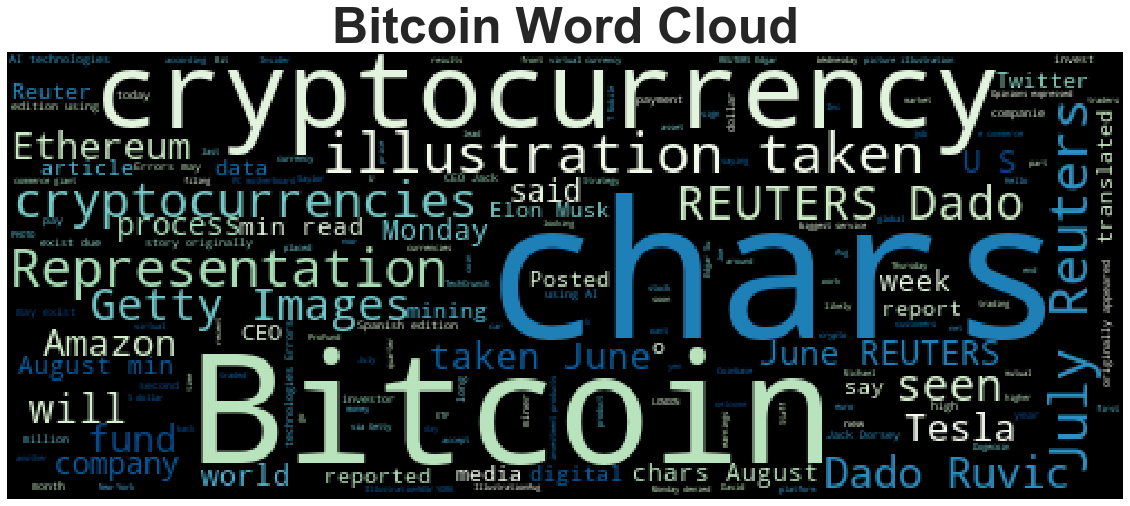

In [56]:
wordcloud(btc_df.text.str.cat(), title="Bitcoin Word Cloud")

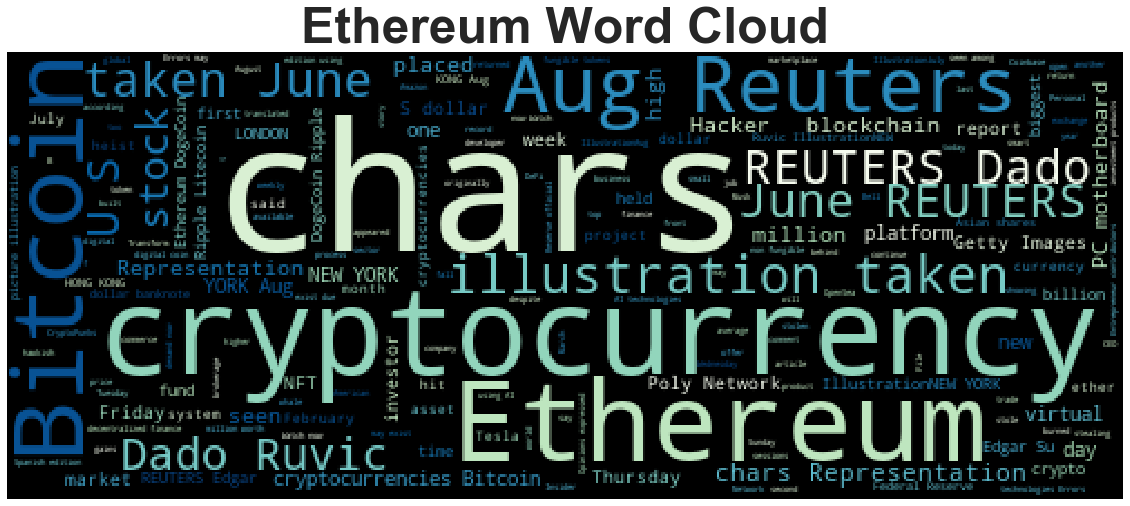

In [59]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
wordcloud(eth_df.text.str.cat(), title="Ethereum Word Cloud")

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [60]:
import spacy
from spacy import displacy

In [61]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [62]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [63]:
# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!
all_btc_text = btc_df.text.str.cat()
all_btc_text

'When my wife started a little garden in our urban backyard, all I could think about were the worms. Also the bugs, and the dirt, which is of course filled with worms and bugs and composted corn cobs.… [+3499 chars]Like Dogecoin devotees, the mayor of Reno, and the leaders of El Salvador, Aldo Baoicchi is convinced cryptocurrency is the future. The CEO and founder of Canadian scooter maker Daymak believes this … [+4116 chars]Photo by Joe Raedle/Getty Images\r\n\n \n\n Twitter and Square CEO Jack Dorsey, a noted superfan of Bitcoin, claimed on Monday that the cryptocurrency will eventually unite the world. Yes, really.\nOn Mond… [+2119 chars]By Joe TidyCyber reporter \r\n"Follow the money" - for generations it\'s been the mantra of investigators looking for criminals.\r\nIn the cyber-realm, this battle between criminals and the authorities ha… [+3786 chars]To get a roundup of TechCrunchs biggest and most important stories delivered to your inbox every day at 3 p.m. PDT, subscribe here.\

In [64]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
doc = nlp(all_btc_text)

# Add a title to the document
# YOUR CODE HERE!
doc.user_data["title"] = "Bitcoin NER"

In [65]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(doc, style='ent', jupyter=True)

In [66]:
# List all Entities
# YOUR CODE HERE!
for ent in doc.ents:
        print(ent.text, ent.label_)

Reno GPE
El Salvador GPE
Aldo Baoicchi GPE
Canadian NORP
Daymak ORG
Joe Raedle/ PERSON
Twitter PRODUCT
Square PRODUCT
Jack Dorsey PERSON
Monday DATE
Joe PERSON
every day DATE
3 p.m. PDT TIME
Daily Crunch ORG
July 23, 2021 DATE
chars]T-Mobile ORG
two years DATE
roughly 49 million CARDINAL
Michael Arrington PERSON
TechCrunch LOC
Crunchbase ORG
CrunchFund PRODUCT
Tuesday DATE
2017 DATE
today DATE
Coinbase PERSON
its second quarter DATE
the quarter DATE
Coinbase ORG
$2.23 billion MONEY
July 28 DATE
Reuters ORG
40,000 MONEY
Wednesday DATE
Motherboard PERSON
T-Mobile ORG
Roughly 47.8 million CARDINAL
June 7, 2021 DATE
REUTERS ORG
Edgar Su/IllustrationAug PERSON
Reuters ORG
7.07% PERCENT
47,587.38 MONEY
2200 CARDINAL
Martin/CNET
A ORG
UK GPE
Spain GPE
Twitter PRODUCT
2020 DATE
the US Department of Justi ORG
November 19, 2020 DATE
REUTERS ORG
Dado Ruvic/IllustrationSINGAPORE ORG
July 21 DATE
Reuters ORG
Reuters ORG
FILE ORG
November 19, 2020 DATE
REUTERS ORG
Dado Ruvic/Illustration
SINGAPORE O

---

### Ethereum NER

In [67]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!
all_eth_text = eth_df.text.str.cat()
all_eth_text

'Blockchain infrastructure startups are heating up as industry fervor brings more developers and users to a space that still feels extremely young despite a heavy institutional embrace of the crypto s… [+2468 chars]Cent was founded in 2017 as an ad-free creator network that allows users to offer each other crypto rewards for good posts and comments — it’s like gifting awards on Reddit, but with Ethereum. But in… [+6228 chars]After the bell today, Coinbase reported another period of impressive results in its second quarter earnings report.\r\nDuring the quarter, Coinbase’s total revenue reached $2.23 billion, which helped t… [+4900 chars]Representation of the Ethereum virtual currency standing on the PC motherboard is seen in this illustration picture, February 3, 2018. REUTERS/Dado Ruvic/IllustrationNEW YORK, Aug 5 (Reuters) - A maj… [+439 chars]HONG KONG, Aug 5 (Reuters) - Ether held near two-month highs on Thursday ahead of a major adjustment to its underlying ethereum blockchain tha

In [68]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
doc = nlp(all_eth_text)

# Add a title to the document
# YOUR CODE HERE!
doc.user_data["title"] = "Ethereum NER"

In [69]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(doc, style='ent', jupyter=True)

In [70]:
# List all Entities
# YOUR CODE HERE!
for ent in doc.ents:
        print(ent.text, ent.label_)

2017 DATE
Reddit NORP
Ethereum PERSON
today DATE
Coinbase PERSON
its second quarter DATE
the quarter DATE
Coinbase ORG
$2.23 billion MONEY
Ethereum PERSON
February 3, 2018 DATE
REUTERS ORG
Dado Ruvic PERSON
Aug 5 DATE
Reuters ORG
Aug 5 DATE
Reuters ORG
two-month DATE
Thursday DATE
Ethereum PERSON
June 29, 2021 DATE
REUTERS ORG
Dado Ruvic/IllustrationAug 3 PERSON
Reuters ORG
Ethereum PERSON
Monday DATE
Amazon ORG
Amazon ORG
Mary-Ann RussonBusiness PERSON
BBC News ORG
almost half CARDINAL
$600m MONEY
433 MONEY
Yesterday DATE
chars]Vitalik Buterin PERSON
TechCrunch Disrupt London 2015 ORG
John Phillips PERSON
Vitalik Buterin PERSON
Ethereum PERSON
June 29, 2021 DATE
REUTERS ORG
Dado Ruvic PERSON
July 30 DATE
Reuters ORG
second ORDINAL
August 5 DATE
Sunday DATE
over 45,799 CARDINAL
second ORDINAL
Dado Ruvic PERSON
Reuters ORG
More than $144 million MONEY
Livepeer PERSON
$20 million MONEY
Ethereum PERSON
Spanish NORP
AI ORG
Xoy Capital PERSON
Guadalajara GPE
Jalisco GPE
Xoycoin PERSON
Ether

---